In [2]:
library(scRepertoire)

Loading required package: ggplot2

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 



In [3]:
FT1 <- read.csv("/node200data/FTC/data/cellranger_multi_outs/FT1/outs/per_sample_outs/FT1/vdj_t/filtered_contig_annotations.csv")
FT2 <- read.csv("/node200data/FTC/data/cellranger_multi_outs/FT2/outs/per_sample_outs/FT2/vdj_t/filtered_contig_annotations.csv")
FT3 <- read.csv("/node200data/FTC/data/cellranger_multi_outs/FT3/outs/per_sample_outs/FT3/vdj_t/filtered_contig_annotations.csv")
FT4 <- read.csv("/node200data/FTC/data/cellranger_multi_outs/FT4/outs/per_sample_outs/FT4/vdj_t/filtered_contig_annotations.csv")
FT5 <- read.csv("/node200data/FTC/data/cellranger_multi_outs/FT5/outs/per_sample_outs/FT5/vdj_t/filtered_contig_annotations.csv")

contig_list <- list(FT1,FT2,FT3,FT4,FT5)
data("contig_list")

In [4]:
combined <- combineTCR(contig_list,
                      samples = c("FT1","FT2","FT3","FT4","FT5"),
                      cells = "T-AB",
                      ID = c("a","a","a","c","c"),
                      removeNA = T,
                      removeMulti = T)

Warning message:
“Removed 10 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_text()`).”


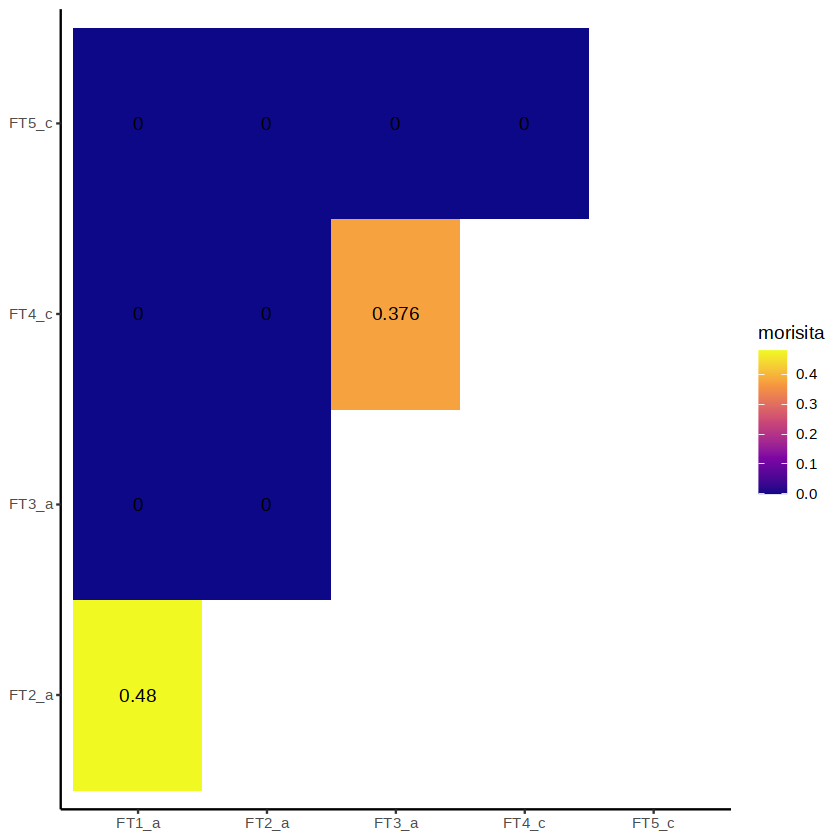

Warning message:
“Removed 10 rows containing missing values (`geom_text()`).”


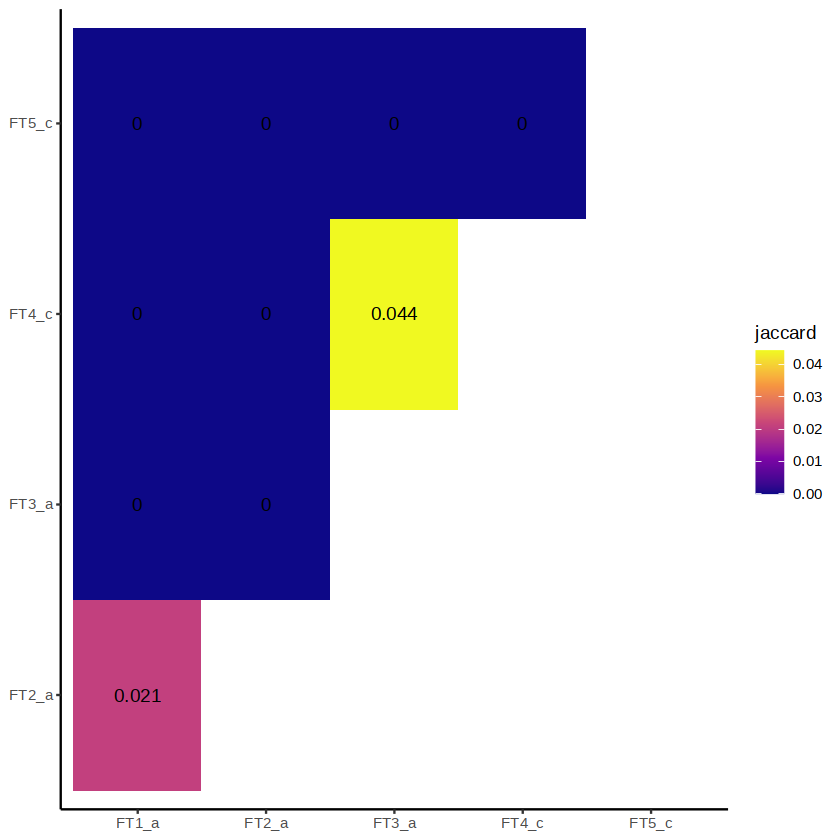

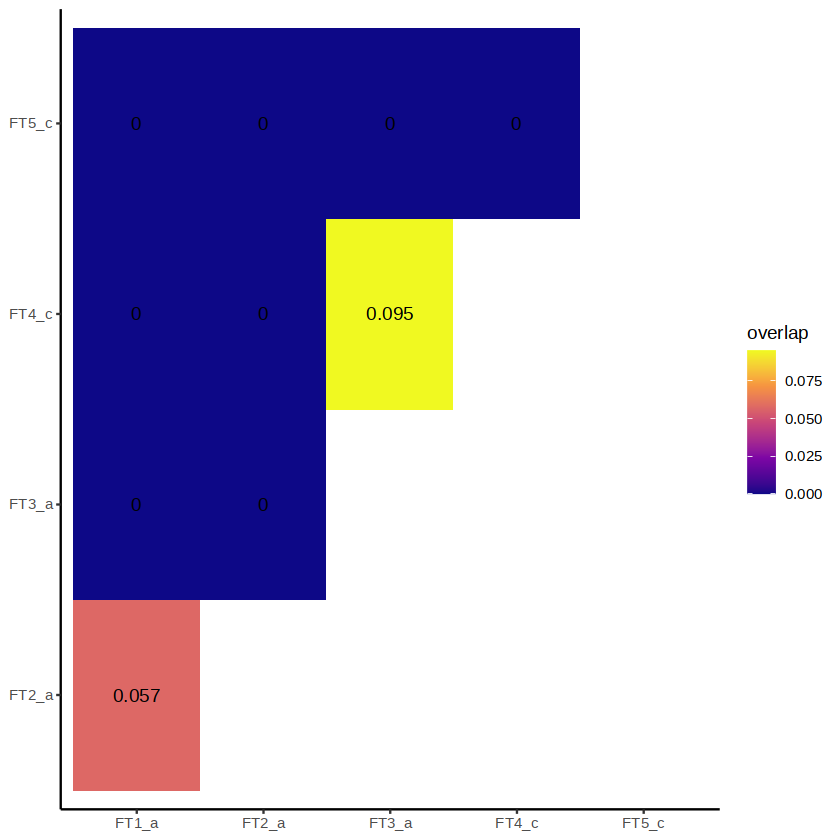

In [4]:
clonalOverlap(combined,
             cloneCall = "strict",
             method = "morisita")
#data("contig_list") 필요
clonalOverlap(combined,
             cloneCall = "strict",
             method = "jaccard")
#data("contig_list") 필요
clonalOverlap(combined,
             cloneCall = "strict",
             method = "overlap")
#data("contig_list") 필요

In [5]:
morisita <- clonalOverlap(combined,
             cloneCall = "strict",
             method = "morisita")

In [6]:
morisita$data

names,variable,value
<fct>,<fct>,<dbl>
FT1_a,FT2_a,0.4795770
FT2_a,FT2_a,NA
FT3_a,FT2_a,NA
FT4_c,FT2_a,NA
FT5_c,FT2_a,NA
FT1_a,FT3_a,0.0000000
FT2_a,FT3_a,0.0000000
FT3_a,FT3_a,NA
FT4_c,FT3_a,NA


NULL

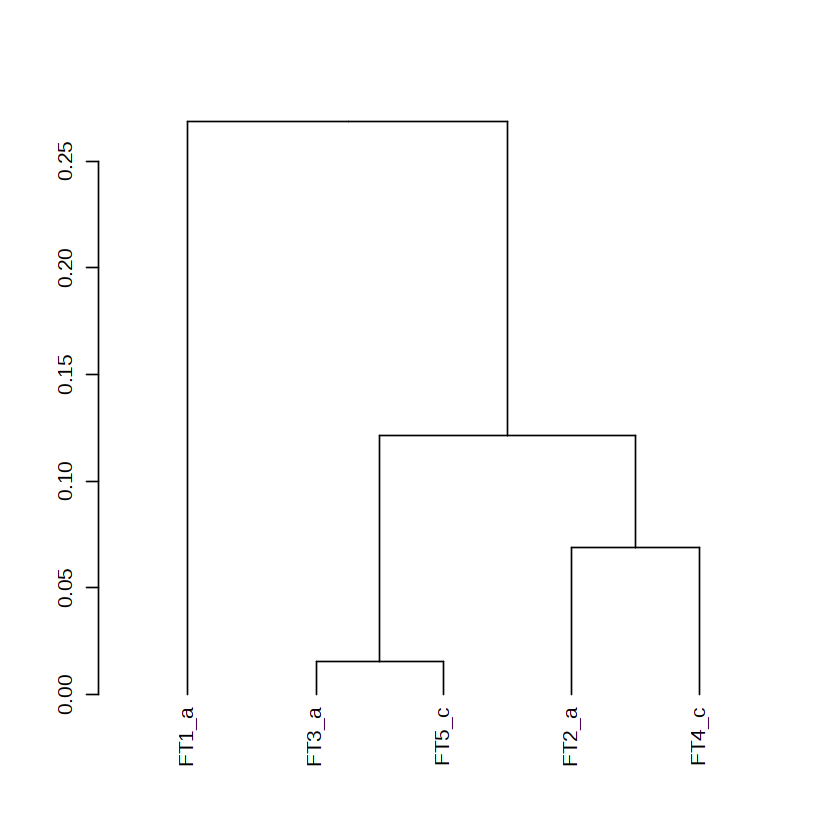

In [7]:
clonesizeDistribution(combined,
                     cloneCall = "gene+nt",
                      chain = "both",
                     method = "ward.D2")
#data("contig_list") 필요

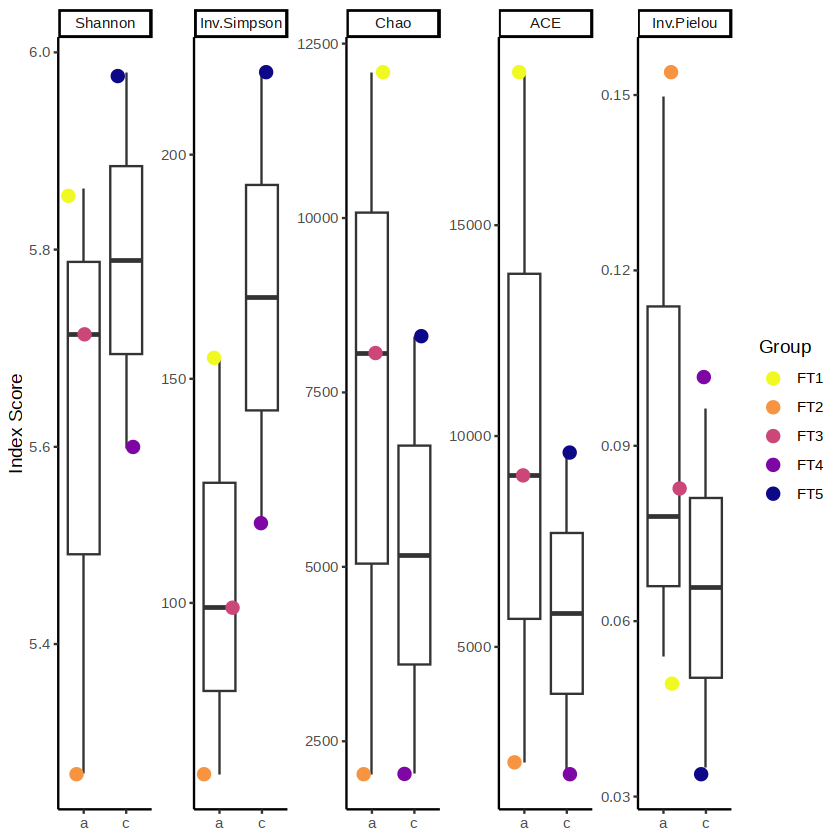

In [ ]:
clonalDiversity(combined,
               cloneCall = "gene",
               group.by = "sample",
               x.axis = "ID",
               n.boots = 100)

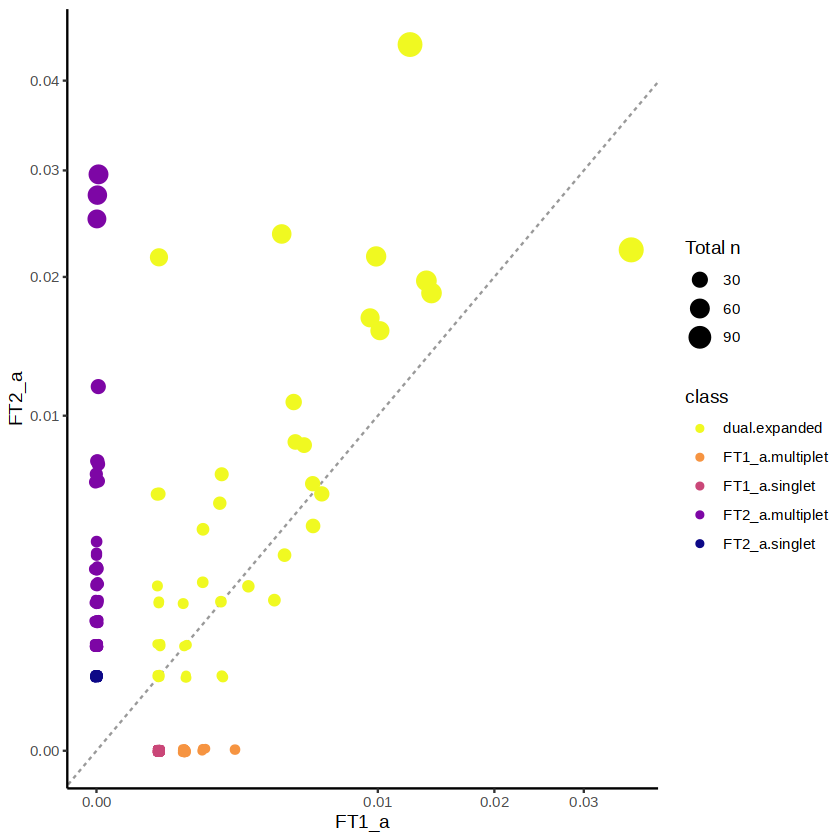

In [9]:
scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT1_a", 
                 y.axis = "FT2_a",
                 dot.size = "total",
                 graph = "proportion")

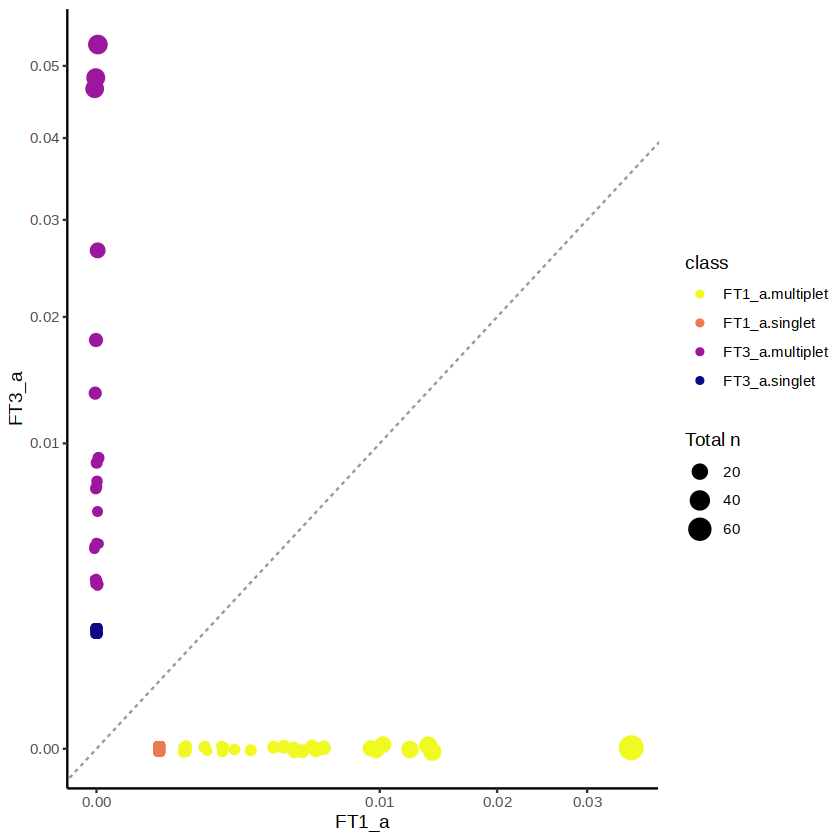

In [10]:
scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT1_a", 
                 y.axis = "FT3_a",
                 dot.size = "total",
                 graph = "proportion")

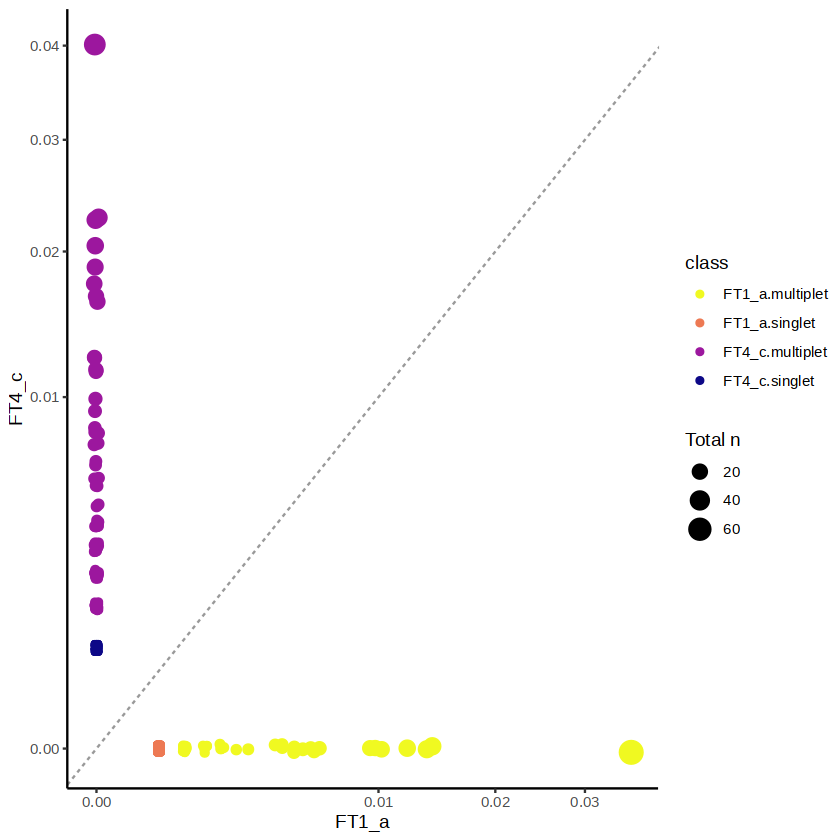

In [11]:
scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT1_a", 
                 y.axis = "FT4_c",
                 dot.size = "total",
                 graph = "proportion")

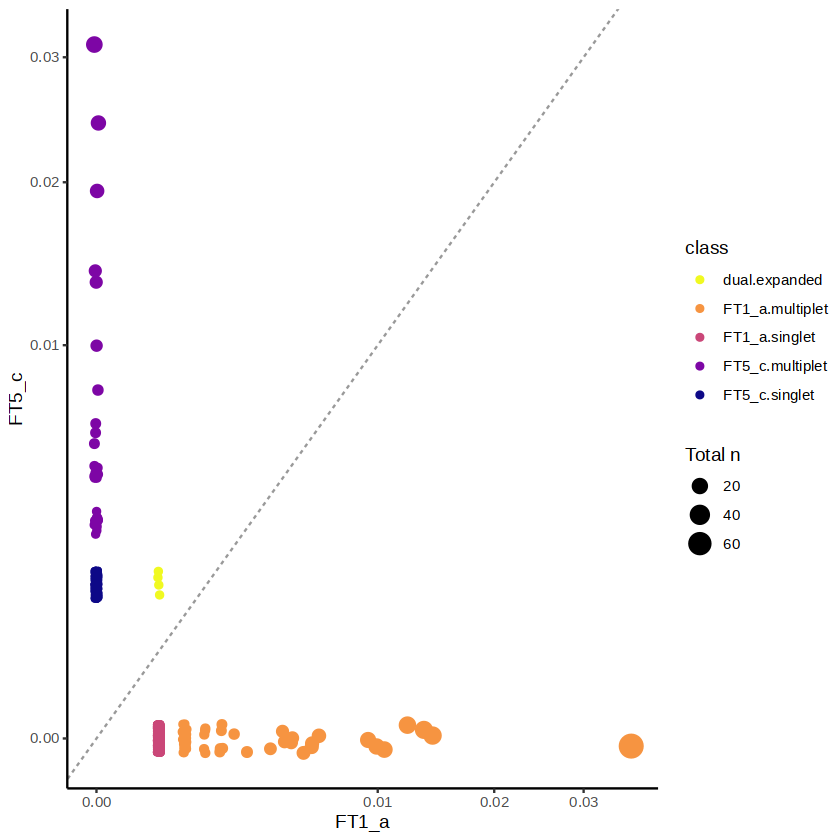

In [12]:
scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT1_a", 
                 y.axis = "FT5_c",
                 dot.size = "total",
                 graph = "proportion")

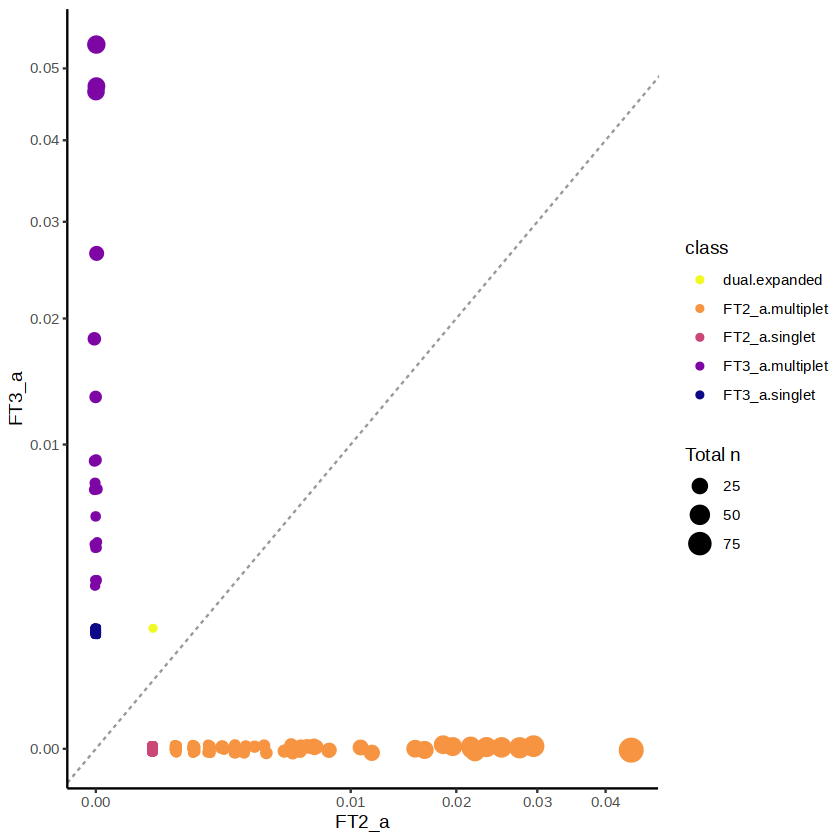

In [13]:
scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT2_a", 
                 y.axis = "FT3_a",
                 dot.size = "total",
                 graph = "proportion")

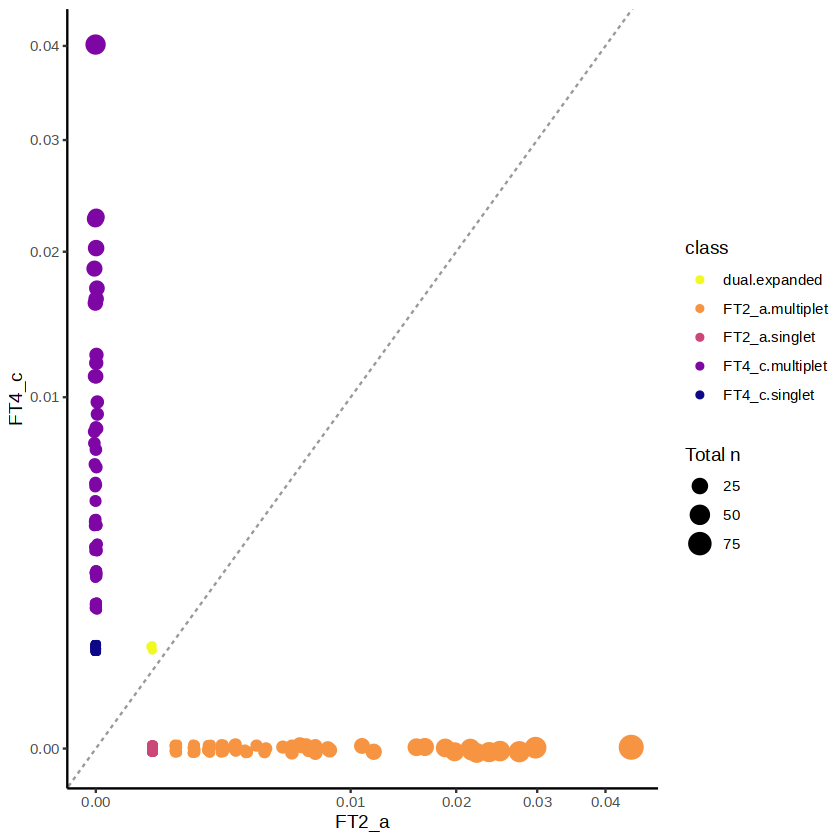

In [14]:
scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT2_a", 
                 y.axis = "FT4_c",
                 dot.size = "total",
                 graph = "proportion")

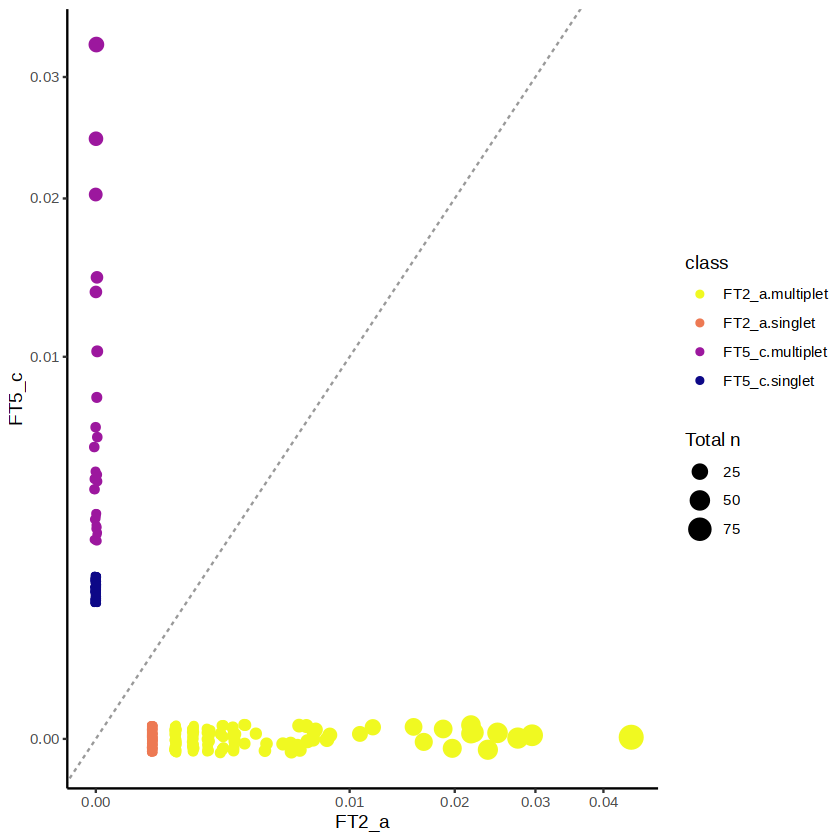

In [15]:
scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT2_a", 
                 y.axis = "FT5_c",
                 dot.size = "total",
                 graph = "proportion")

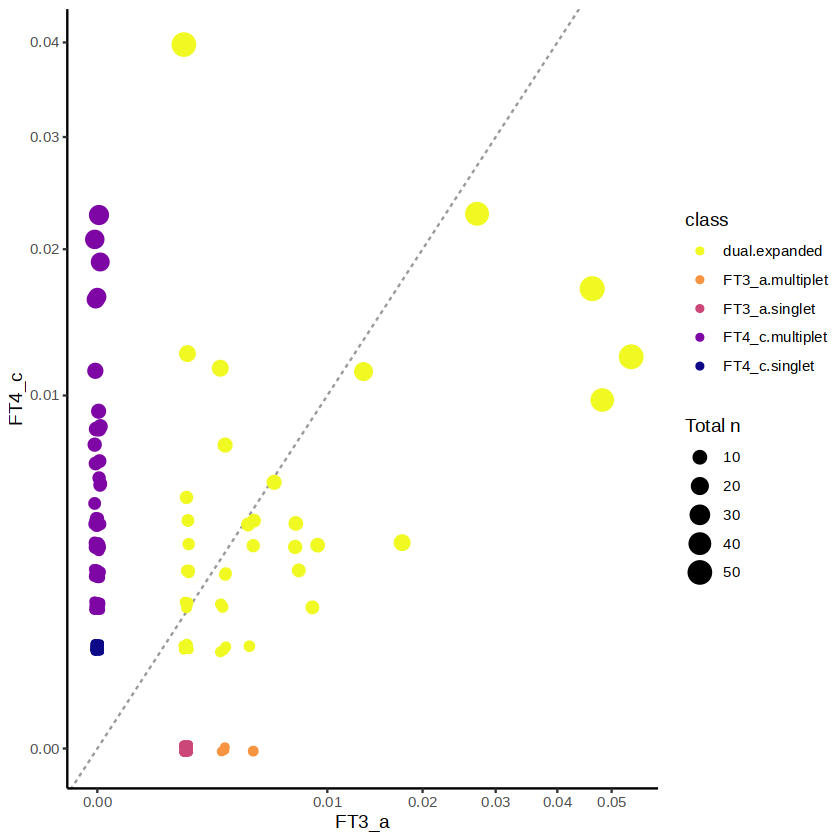

In [16]:
scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT3_a", 
                 y.axis = "FT4_c",
                 dot.size = "total",
                 graph = "proportion")

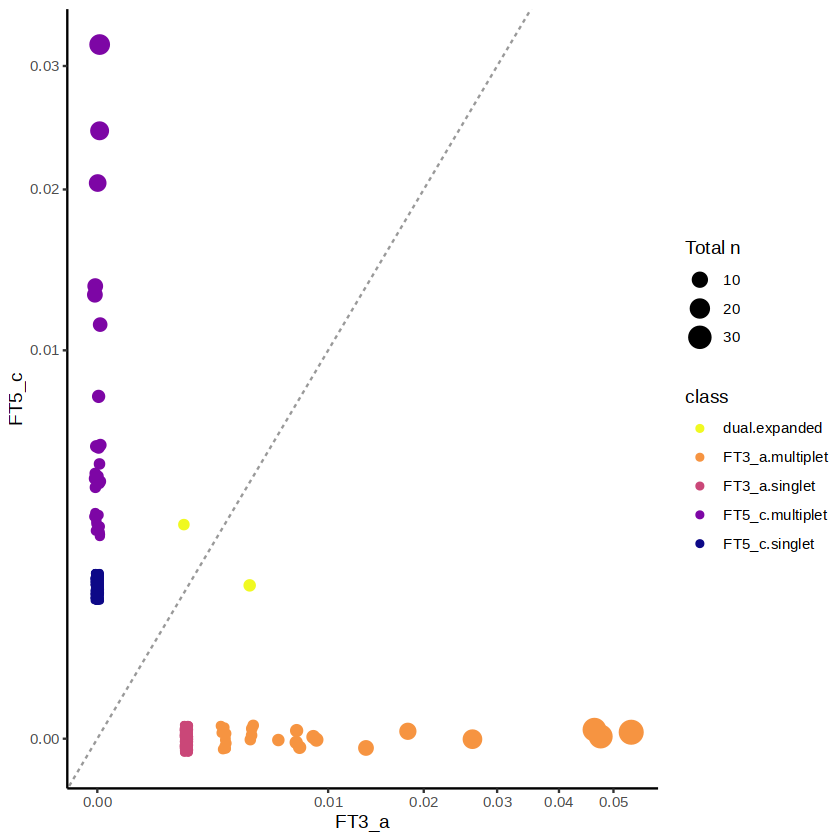

In [17]:
scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT3_a", 
                 y.axis = "FT5_c",
                 dot.size = "total",
                 graph = "proportion")

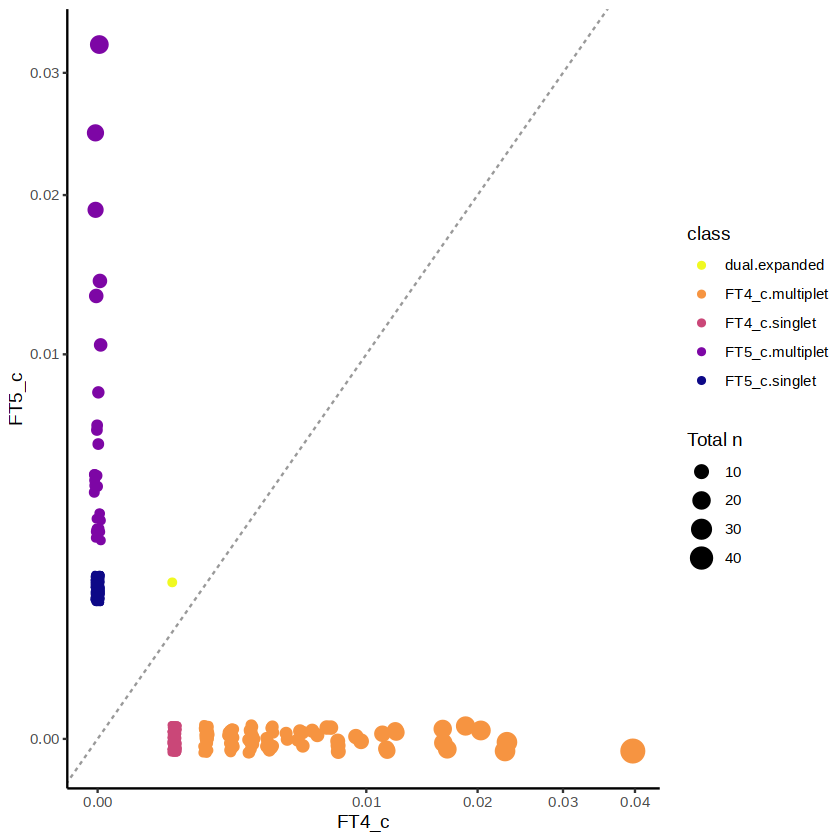

In [18]:
scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT4_c", 
                 y.axis = "FT5_c",
                 dot.size = "total",
                 graph = "proportion")

In [5]:
compare12 <- scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT1_a", 
                 y.axis = "FT2_a",
                 dot.size = "total",
                 graph = "proportion")
plot_data <- ggplot_build(compare12)$data[[1]]
plot_data$slope
plot_data

[1] 1

intercept,slope,PANEL,group,colour,linewidth,linetype,alpha
<dbl>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>
0,1,1,-1,black,0.5,2,0.4


In [6]:
compare13 <- scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT1_a", 
                 y.axis = "FT3_a",
                 dot.size = "total",
                 graph = "proportion")
plot_data <- ggplot_build(compare13)$data[[1]]
plot_data$slope
plot_data

[1] 1

intercept,slope,PANEL,group,colour,linewidth,linetype,alpha
<dbl>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>
0,1,1,-1,black,0.5,2,0.4


In [7]:
compare14 <- scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT1_a", 
                 y.axis = "FT4_c",
                 dot.size = "total",
                 graph = "proportion")
plot_data <- ggplot_build(compare14)$data[[1]]
plot_data$slope
plot_data

[1] 1

intercept,slope,PANEL,group,colour,linewidth,linetype,alpha
<dbl>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>
0,1,1,-1,black,0.5,2,0.4


In [8]:
compare15 <- scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT1_a", 
                 y.axis = "FT5_c",
                 dot.size = "total",
                 graph = "proportion")
plot_data <- ggplot_build(compare15)$data[[1]]
plot_data$slope
plot_data

[1] 1

intercept,slope,PANEL,group,colour,linewidth,linetype,alpha
<dbl>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>
0,1,1,-1,black,0.5,2,0.4


In [9]:
compare23 <- scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT2_a", 
                 y.axis = "FT3_a",
                 dot.size = "total",
                 graph = "proportion")
plot_data <- ggplot_build(compare23)$data[[1]]
plot_data$slope
plot_data

[1] 1

intercept,slope,PANEL,group,colour,linewidth,linetype,alpha
<dbl>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>
0,1,1,-1,black,0.5,2,0.4


In [10]:
compare24 <- scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT2_a", 
                 y.axis = "FT4_c",
                 dot.size = "total",
                 graph = "proportion")
plot_data <- ggplot_build(compare24)$data[[1]]
plot_data$slope
plot_data

[1] 1

intercept,slope,PANEL,group,colour,linewidth,linetype,alpha
<dbl>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>
0,1,1,-1,black,0.5,2,0.4


In [11]:
compare25 <- scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT2_a", 
                 y.axis = "FT5_c",
                 dot.size = "total",
                 graph = "proportion")
plot_data <- ggplot_build(compare25)$data[[1]]
plot_data$slope
plot_data

[1] 1

intercept,slope,PANEL,group,colour,linewidth,linetype,alpha
<dbl>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>
0,1,1,-1,black,0.5,2,0.4


In [12]:
compare34 <- scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT3_a", 
                 y.axis = "FT4_c",
                 dot.size = "total",
                 graph = "proportion")
plot_data <- ggplot_build(compare34)$data[[1]]
plot_data$slope
plot_data

[1] 1

intercept,slope,PANEL,group,colour,linewidth,linetype,alpha
<dbl>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>
0,1,1,-1,black,0.5,2,0.4


In [13]:
compare35 <- scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT3_a", 
                 y.axis = "FT5_c",
                 dot.size = "total",
                 graph = "proportion")
plot_data <- ggplot_build(compare35)$data[[1]]
plot_data$slope
plot_data

[1] 1

intercept,slope,PANEL,group,colour,linewidth,linetype,alpha
<dbl>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>
0,1,1,-1,black,0.5,2,0.4


In [14]:
compare45 <- scatterClonotype(combined, cloneCall ="gene", 
                 x.axis = "FT4_c", 
                 y.axis = "FT5_c",
                 dot.size = "total",
                 graph = "proportion")
plot_data <- ggplot_build(compare45)$data[[1]]
plot_data$slope
plot_data

[1] 1

intercept,slope,PANEL,group,colour,linewidth,linetype,alpha
<dbl>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>
0,1,1,-1,black,0.5,2,0.4


In [15]:
de12 <- compare12$data[compare12$data$class == "dual.expanded", "Var1"]
de13 <- compare13$data[compare13$data$class == "dual.expanded", "Var1"]
de14 <- compare14$data[compare14$data$class == "dual.expanded", "Var1"]
de15 <- compare15$data[compare15$data$class == "dual.expanded", "Var1"]
de23 <- compare23$data[compare23$data$class == "dual.expanded", "Var1"]
de24 <- compare24$data[compare24$data$class == "dual.expanded", "Var1"]
de25 <- compare25$data[compare25$data$class == "dual.expanded", "Var1"]
de34 <- compare34$data[compare34$data$class == "dual.expanded", "Var1"]
de35 <- compare35$data[compare35$data$class == "dual.expanded", "Var1"]
de45 <- compare45$data[compare45$data$class == "dual.expanded", "Var1"]

In [16]:
length(unique(de12))
length(unique(de13))
length(unique(de14))
length(unique(de15))
length(unique(de23))
length(unique(de24))
length(unique(de25))
length(unique(de34))
length(unique(de35))
length(unique(de45))

[1] 54

[1] 0

[1] 0

[1] 4

[1] 1

[1] 3

[1] 0

[1] 54

[1] 2

[1] 1

In [17]:
length(de12)
length(de13)
length(de14)
length(de15)
length(de23)
length(de24)
length(de25)
length(de34)
length(de35)
length(de45)
sum(length(de12),
length(de13),
length(de14),
length(de15),
length(de23),
length(de24),
length(de25),
length(de34),
length(de35),
length(de45))

[1] 54

[1] 0

[1] 0

[1] 4

[1] 1

[1] 3

[1] 0

[1] 54

[1] 2

[1] 1

[1] 119

In [18]:
de12 #54
de15 #4
de23 #1
de24 #3
de34 #54
de35 #2
de45 #1

[1] TRAV1-1.TRAJ36.TRAC_TRBV4-1.TRBD1.TRBJ1-2.TRBC1     
 [2] TRAV1-2.TRAJ20.TRAC_TRBV19.TRBD2.TRBJ2-6.TRBC2      
 [3] TRAV1-2.TRAJ6.TRAC_TRBV28.TRBD1.TRBJ2-1.TRBC2       
 [4] TRAV10.TRAJ42.TRAC_TRBV27.TRBD1.TRBJ1-5.TRBC1       
 [5] TRAV12-1.TRAJ12.TRAC_TRBV12-4.TRBD1.TRBJ2-1.TRBC2   
 [6] TRAV12-1.TRAJ15.TRAC_TRBV11-2.None.TRBJ1-1.TRBC1    
 [7] TRAV12-1.TRAJ23.TRAC_TRBV5-1.TRBD2.TRBJ2-3.TRBC2    
 [8] TRAV12-1.TRAJ6.TRAC_TRBV27.None.TRBJ2-7.TRBC2       
 [9] TRAV12-2.TRAJ29.TRAC_TRBV19.TRBD2.TRBJ1-5.TRBC1     
[10] TRAV12-2.TRAJ35.TRAC_TRBV5-6.TRBD1.TRBJ1-4.TRBC1    
[11] TRAV13-1.TRAJ10.TRAC_TRBV29-1.None.TRBJ2-1.TRBC2    
[12] TRAV13-1.TRAJ13.TRAC_TRBV6-5.TRBD2.TRBJ1-2.TRBC1    
[13] TRAV13-2.TRAJ23.TRAC_TRBV11-1.TRBD1.TRBJ2-7.TRBC2   
[14] TRAV14DV4.TRAJ33.TRAC_TRBV4-3.TRBD1.TRBJ2-3.TRBC2   
[15] TRAV14DV4.TRAJ49.TRAC_TRBV15.TRBD1.TRBJ1-5.TRBC1    
[16] TRAV14DV4.TRAJ54.TRAC_TRBV7-9.TRBD2.TRBJ1-1.TRBC1   
[17] TRAV14DV4.TRAJ9.TRAC_TRBV5-4.TRBD2.TRBJ2-2.TRBC2    
[18] TRAV17.TRAJ12.TRAC_TRBV12-4.None.TRBJ2-3.TRBC2      
[19] TRAV17.TRAJ20.TRAC_TRBV6-3.TRBD2.TRBJ2-1.TRBC2      
[20] TRAV17.TRAJ38.TRAC_TRBV7-8.TRBD1.TRBJ1-6.TRBC1      
[21] TRAV17.TRAJ39.TRAC_TRBV7-2.TRBD2.TRBJ2-7.TRBC2      
[22] TRAV19.TRAJ9.TRAC_TRBV29-1.TRBD1.TRBJ2-1.TRBC2      
[23] TRAV2.TRAJ37.TRAC_TRBV2.None.TRBJ2-3.TRBC2          
[24] TRAV20.TRAJ38.TRAC_TRBV20-1.TRBD2.TRBJ2-7.TRBC2     
[25] TRAV21.TRAJ5.TRAC_TRBV7-7.TRBD2.TRBJ2-5.TRBC2       
[26] TRAV21.TRAJ56.TRAC_TRBV27.TRBD1.TRBJ1-4.TRBC1       
[27] TRAV23DV6.TRAJ40.TRAC_TRBV29-1.None.TRBJ2-1.TRBC2   
[28] TRAV24.TRAJ28.TRAC_TRBV20-1.None.TRBJ2-2.TRBC2      
[29] TRAV24.TRAJ49.TRAC_TRBV27.TRBD2.TRBJ2-1.TRBC2       
[30] TRAV24.TRAJ9.TRAC_TRBV24-1.None.TRBJ2-2.TRBC2       
[31] TRAV26-1.TRAJ47.TRAC_TRBV6-6.None.TRBJ2-3.TRBC2     
[32] TRAV26-1.TRAJ50.TRAC_TRBV6-5.None.TRBJ2-2.TRBC2     
[33] TRAV26-1.TRAJ50.TRAC_TRBV6-5.TRBD2.TRBJ2-7.TRBC2    
[34] TRAV26-2.TRAJ43.TRAC_TRBV30.TRBD2.TRBJ2-4.TRBC2     
[35] TRAV27.TRAJ27.TRAC_TRBV6-6.None.TRBJ2-7.TRBC2       
[36] TRAV29DV5.TRAJ18.TRAC_TRBV12-4.None.TRBJ2-3.TRBC2   
[37] TRAV29DV5.TRAJ45.TRAC_TRBV2.TRBD1.TRBJ2-1.TRBC2     
[38] TRAV29DV5.TRAJ49.TRAC_TRBV2.TRBD2.TRBJ2-3.TRBC2     
[39] TRAV29DV5.TRAJ52.TRAC_TRBV6-5.None.TRBJ1-6.TRBC1    
[40] TRAV3.TRAJ24.TRAC_TRBV7-8.TRBD1.TRBJ2-1.TRBC2       
[41] TRAV3.TRAJ3.TRAC_TRBV4-3.TRBD1.TRBJ2-3.TRBC2        
[42] TRAV30.TRAJ42.TRAC_TRBV5-1.TRBD1.TRBJ2-7.TRBC2      
[43] TRAV38-1.TRAJ17.TRAC_TRBV11-1.TRBD1.TRBJ2-3.TRBC2   
[44] TRAV38-1.TRAJ23.TRAC_TRBV7-3.TRBD2.TRBJ2-3.TRBC2    
[45] TRAV38-2DV8.TRAJ57.TRAC_TRBV12-4.TRBD2.TRBJ2-1.TRBC2
[46] TRAV41.TRAJ49.TRAC_TRBV4-1.TRBD1.TRBJ1-2.TRBC1      
[47] TRAV5.TRAJ5.TRAC_TRBV12-3.TRBD1.TRBJ1-5.TRBC1       
[48] TRAV6.TRAJ49.TRAC_TRBV6-3.TRBD1.TRBJ1-2.TRBC1       
[49] TRAV6.TRAJ6.TRAC_TRBV19.TRBD2.TRBJ1-5.TRBC1         
[50] TRAV8-3.TRAJ6.TRAC_TRBV12-3.TRBD2.TRBJ2-3.TRBC2     
[51] TRAV8-4.TRAJ10.TRAC_TRBV11-1.None.TRBJ1-2.TRBC1     
[52] TRAV8-4.TRAJ17.TRAC_TRBV6-6.TRBD1.TRBJ1-4.TRBC1     
[53] TRAV8-4.TRAJ40.TRAC_TRBV7-6.None.TRBJ1-1.TRBC1      
[54] TRAV8-6.TRAJ23.TRAC_TRBV7-7.TRBD2.TRBJ2-6.TRBC2     
2539 Levels: TRAV1-1.TRAJ12.TRAC_TRBV9.TRBD2.TRBJ2-1.TRBC2 ...

[1] TRAV12-2.TRAJ58.TRAC_TRBV19.TRBD2.TRBJ2-5.TRBC2   
[2] TRAV14DV4.TRAJ49.TRAC_TRBV11-2.TRBD2.TRBJ2-1.TRBC2
[3] TRAV29DV5.TRAJ44.TRAC_TRBV9.TRBD1.TRBJ1-1.TRBC1   
[4] TRAV3.TRAJ15.TRAC_TRBV5-1.TRBD2.TRBJ2-3.TRBC2     
2219 Levels: TRAV1-1.TRAJ12.TRAC_TRBV9.TRBD2.TRBJ2-1.TRBC2 ...

[1] TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2
1404 Levels: TRAV1-1.TRAJ11.TRAC_TRBV30.None.TRBJ2-2.TRBC2 ...

[1] TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2
[2] TRAV12-2.TRAJ45.TRAC_TRBV6-5.TRBD2.TRBJ2-4.TRBC2
[3] TRAV12-2.TRAJ9.TRAC_TRBV14.TRBD2.TRBJ2-7.TRBC2  
1524 Levels: TRAV1-1.TRAJ11.TRAC_TRBV30.None.TRBJ2-2.TRBC2 ...

[1] TRAV1-2.TRAJ18.TRAC_TRBV5-4.None.TRBJ2-1.TRBC2    
 [2] TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2  
 [3] TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD2.TRBJ2-5.TRBC2  
 [4] TRAV1-2.TRAJ33.TRAC_TRBV6-4.TRBD1.TRBJ2-3.TRBC2   
 [5] TRAV1-2.TRAJ33.TRAC_TRBV6-4.TRBD2.TRBJ2-3.TRBC2   
 [6] TRAV12-1.TRAJ30.TRAC_TRBV9.TRBD1.TRBJ2-7.TRBC2    
 [7] TRAV12-2.TRAJ12.TRAC_TRBV7-3.TRBD2.TRBJ2-5.TRBC2  
 [8] TRAV12-2.TRAJ22.TRAC_TRBV28.TRBD1.TRBJ2-7.TRBC2   
 [9] TRAV12-2.TRAJ29.TRAC_TRBV19.TRBD1.TRBJ2-1.TRBC2   
[10] TRAV12-2.TRAJ52.TRAC_TRBV19.TRBD2.TRBJ2-1.TRBC2   
[11] TRAV12-3.TRAJ43.TRAC_TRBV7-8.TRBD2.TRBJ2-1.TRBC2  
[12] TRAV13-1.TRAJ49.TRAC_TRBV27.TRBD1.TRBJ2-7.TRBC2   
[13] TRAV14DV4.TRAJ13.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2
[14] TRAV14DV4.TRAJ37.TRAC_TRBV14.None.TRBJ2-7.TRBC2   
[15] TRAV14DV4.TRAJ42.TRAC_TRBV19.TRBD1.TRBJ1-1.TRBC1  
[16] TRAV14DV4.TRAJ57.TRAC_TRBV13.TRBD2.TRBJ2-7.TRBC2  
[17] TRAV14DV4.TRAJ6.TRAC_TRBV28.TRBD1.TRBJ2-7.TRBC2   
[18] TRAV17.TRAJ13.TRAC_TRBV3-1.TRBD2.TRBJ2-3.TRBC2    
[19] TRAV17.TRAJ15.TRAC_TRBV7-3.None.TRBJ2-1.TRBC2     
[20] TRAV17.TRAJ20.TRAC_TRBV10-3.TRBD1.TRBJ2-7.TRBC2   
[21] TRAV17.TRAJ42.TRAC_TRBV7-8.TRBD2.TRBJ2-7.TRBC2    
[22] TRAV17.TRAJ48.TRAC_TRBV15.TRBD2.TRBJ2-5.TRBC2     
[23] TRAV19.TRAJ7.TRAC_TRBV20-1.TRBD2.TRBJ2-5.TRBC2    
[24] TRAV19.TRAJ9.TRAC_TRBV28.TRBD2.TRBJ2-7.TRBC2      
[25] TRAV21.TRAJ39.TRAC_TRBV20-1.TRBD2.TRBJ1-1.TRBC1   
[26] TRAV21.TRAJ45.TRAC_TRBV6-5.TRBD2.TRBJ2-1.TRBC2    
[27] TRAV21.TRAJ56.TRAC_TRBV9.TRBD1.TRBJ1-2.TRBC1      
[28] TRAV22.TRAJ13.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2   
[29] TRAV22.TRAJ23.TRAC_TRBV7-9.TRBD1.TRBJ1-2.TRBC1    
[30] TRAV25.TRAJ16.TRAC_TRBV27.TRBD2.TRBJ1-1.TRBC1     
[31] TRAV26-1.TRAJ34.TRAC_TRBV29-1.TRBD1.TRBJ2-3.TRBC2 
[32] TRAV29DV5.TRAJ39.TRAC_TRBV27.TRBD1.TRBJ2-7.TRBC2  
[33] TRAV29DV5.TRAJ40.TRAC_TRBV5-6.None.TRBJ2-5.TRBC2  
[34] TRAV29DV5.TRAJ50.TRAC_TRBV7-2.TRBD1.TRBJ2-2.TRBC2 
[35] TRAV29DV5.TRAJ58.TRAC_TRBV5-6.TRBD2.TRBJ1-6.TRBC1 
[36] TRAV3.TRAJ10.TRAC_TRBV27.TRBD1.TRBJ1-2.TRBC1      
[37] TRAV3.TRAJ12.TRAC_TRBV7-9.None.TRBJ2-1.TRBC2      
[38] TRAV3.TRAJ20.TRAC_TRBV27.TRBD1.TRBJ2-7.TRBC2      
[39] TRAV3.TRAJ4.TRAC_TRBV7-3.TRBD1.TRBJ2-7.TRBC2      
[40] TRAV3.TRAJ45.TRAC_TRBV25-1.None.TRBJ2-3.TRBC2     
[41] TRAV35.TRAJ13.TRAC_TRBV12-3.TRBD1.TRBJ2-3.TRBC2   
[42] TRAV38-2DV8.TRAJ30.TRAC_TRBV28.TRBD2.TRBJ1-6.TRBC1
[43] TRAV38-2DV8.TRAJ41.TRAC_TRBV13.None.TRBJ2-3.TRBC2 
[44] TRAV39.TRAJ58.TRAC_TRBV29-1.TRBD2.TRBJ1-1.TRBC1   
[45] TRAV4.TRAJ26.TRAC_TRBV5-5.TRBD1.TRBJ2-7.TRBC2     
[46] TRAV41.TRAJ44.TRAC_TRBV28.TRBD1.TRBJ1-1.TRBC1     
[47] TRAV41.TRAJ45.TRAC_TRBV28.TRBD2.TRBJ1-5.TRBC1     
[48] TRAV5.TRAJ24.TRAC_TRBV27.TRBD2.TRBJ2-1.TRBC2      
[49] TRAV5.TRAJ34.TRAC_TRBV28.TRBD2.TRBJ2-7.TRBC2      
[50] TRAV8-2.TRAJ3.TRAC_TRBV12-3.TRBD2.TRBJ1-2.TRBC1   
[51] TRAV8-3.TRAJ43.TRAC_TRBV11-2.None.TRBJ2-1.TRBC2   
[52] TRAV8-6.TRAJ15.TRAC_TRBV11-2.None.TRBJ1-3.TRBC1   
[53] TRAV8-6.TRAJ15.TRAC_TRBV11-2.TRBD2.TRBJ2-3.TRBC2  
[54] TRAV9-2.TRAJ12.TRAC_TRBV18.TRBD1.TRBJ2-2.TRBC2    
1050 Levels: TRAV1-1.TRAJ6.TRAC_TRBV11-2.TRBD2.TRBJ2-1.TRBC2 ...

[1] TRAV1-2.TRAJ33.TRAC_TRBV6-4.TRBD2.TRBJ2-1.TRBC2
[2] TRAV1-2.TRAJ33.TRAC_TRBV6-4.TRBD2.TRBJ2-3.TRBC2
1033 Levels: TRAV1-1.TRAJ6.TRAC_TRBV11-2.TRBD2.TRBJ2-1.TRBC2 ...

[1] TRAV1-2.TRAJ33.TRAC_TRBV6-4.TRBD2.TRBJ2-3.TRBC2
1156 Levels: TRAV1-1.TRAJ23.TRAC_TRBV27.TRBD1.TRBJ1-2.TRBC1 ...

In [21]:
de15
de23
de24
de35
de45

[1] TRAV12-2.TRAJ58.TRAC_TRBV19.TRBD2.TRBJ2-5.TRBC2   
[2] TRAV14DV4.TRAJ49.TRAC_TRBV11-2.TRBD2.TRBJ2-1.TRBC2
[3] TRAV29DV5.TRAJ44.TRAC_TRBV9.TRBD1.TRBJ1-1.TRBC1   
[4] TRAV3.TRAJ15.TRAC_TRBV5-1.TRBD2.TRBJ2-3.TRBC2     
2219 Levels: TRAV1-1.TRAJ12.TRAC_TRBV9.TRBD2.TRBJ2-1.TRBC2 ...

[1] TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2
1404 Levels: TRAV1-1.TRAJ11.TRAC_TRBV30.None.TRBJ2-2.TRBC2 ...

[1] TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2
[2] TRAV12-2.TRAJ45.TRAC_TRBV6-5.TRBD2.TRBJ2-4.TRBC2
[3] TRAV12-2.TRAJ9.TRAC_TRBV14.TRBD2.TRBJ2-7.TRBC2  
1524 Levels: TRAV1-1.TRAJ11.TRAC_TRBV30.None.TRBJ2-2.TRBC2 ...

[1] TRAV1-2.TRAJ33.TRAC_TRBV6-4.TRBD2.TRBJ2-1.TRBC2
[2] TRAV1-2.TRAJ33.TRAC_TRBV6-4.TRBD2.TRBJ2-3.TRBC2
1033 Levels: TRAV1-1.TRAJ6.TRAC_TRBV11-2.TRBD2.TRBJ2-1.TRBC2 ...

[1] TRAV1-2.TRAJ33.TRAC_TRBV6-4.TRBD2.TRBJ2-3.TRBC2
1156 Levels: TRAV1-1.TRAJ23.TRAC_TRBV27.TRBD1.TRBJ1-2.TRBC1 ...

In [20]:
allde <- c(de12, de15, de23, de24, de34, de35, de45)
length(allde)
#겹치는 것 x

[1] 119

In [72]:
combined$FT1_a

barcode,sample,ID,TCR1,cdr3_aa1,cdr3_nt1,TCR2,cdr3_aa2,cdr3_nt2,CTgene,CTnt,CTaa,CTstrict,cellType
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
FT1_a_AAACCTGAGCATCATC,FT1,a,TRAV12-1.TRAJ37.TRAC,CVVNDEGSSNTGKLIF,TGTGTGGTGAACGATGAAGGCTCTAGCAACACAGGCAAACTAATCTTT,TRBV5-1.TRBD2.TRBJ2-2.TRBC2,CASSWSGAGDGELFF,TGCGCCAGCAGCTGGTCAGGAGCGGGAGACGGGGAGCTGTTTTTT,TRAV12-1.TRAJ37.TRAC_TRBV5-1.TRBD2.TRBJ2-2.TRBC2,TGTGTGGTGAACGATGAAGGCTCTAGCAACACAGGCAAACTAATCTTT_TGCGCCAGCAGCTGGTCAGGAGCGGGAGACGGGGAGCTGTTTTTT,CVVNDEGSSNTGKLIF_CASSWSGAGDGELFF,TRAV12-1.TRAJ37.TRAC_TGTGTGGTGAACGATGAAGGCTCTAGCAACACAGGCAAACTAATCTTT_TRBV5-1.TRBD2.TRBJ2-2.TRBC2_TGCGCCAGCAGCTGGTCAGGAGCGGGAGACGGGGAGCTGTTTTTT,T-AB
FT1_a_AAACCTGCAAACGCGA,FT1,a,TRAV29DV5.TRAJ22.TRAC,CAASGYGSARQLTF,TGTGCAGCAAGCGGTTACGGTTCTGCAAGGCAACTGACCTTT,TRBV2.TRBD1.TRBJ1-6.TRBC1,CASRVQGNRGSPLHF,TGTGCCAGCAGGGTACAGGGTAATAGGGGTTCACCCCTCCACTTT,TRAV29DV5.TRAJ22.TRAC_TRBV2.TRBD1.TRBJ1-6.TRBC1,TGTGCAGCAAGCGGTTACGGTTCTGCAAGGCAACTGACCTTT_TGTGCCAGCAGGGTACAGGGTAATAGGGGTTCACCCCTCCACTTT,CAASGYGSARQLTF_CASRVQGNRGSPLHF,TRAV29DV5.TRAJ22.TRAC_TGTGCAGCAAGCGGTTACGGTTCTGCAAGGCAACTGACCTTT_TRBV2.TRBD1.TRBJ1-6.TRBC1_TGTGCCAGCAGGGTACAGGGTAATAGGGGTTCACCCCTCCACTTT,T-AB
FT1_a_AAACCTGGTGAAAGAG,FT1,a,TRAV2.TRAJ42.TRAC,CAAGGGGSQGNLIF,TGTGCTGCGGGAGGGGGAGGAAGCCAAGGAAATCTCATCTTT,TRBV3-1.TRBD1.TRBJ2-5.TRBC2,CASSQNRVETQYF,TGTGCCAGCAGCCAAAACAGGGTAGAGACCCAGTACTTC,TRAV2.TRAJ42.TRAC_TRBV3-1.TRBD1.TRBJ2-5.TRBC2,TGTGCTGCGGGAGGGGGAGGAAGCCAAGGAAATCTCATCTTT_TGTGCCAGCAGCCAAAACAGGGTAGAGACCCAGTACTTC,CAAGGGGSQGNLIF_CASSQNRVETQYF,TRAV2.TRAJ42.TRAC_TGTGCTGCGGGAGGGGGAGGAAGCCAAGGAAATCTCATCTTT_TRBV3-1.TRBD1.TRBJ2-5.TRBC2_TGTGCCAGCAGCCAAAACAGGGTAGAGACCCAGTACTTC,T-AB
FT1_a_AAACGGGGTAAACGCG,FT1,a,TRAV13-1.TRAJ9.TRAC,CALQGPLGGFKTIF,TGTGCCCTACAGGGGCCACTAGGAGGCTTCAAAACTATCTTT,TRBV29-1.TRBD1.TRBJ2-1.TRBC2,CSVEALRGANEQFF,TGCAGCGTTGAAGCCCTTAGGGGGGCAAATGAGCAGTTCTTC,TRAV13-1.TRAJ9.TRAC_TRBV29-1.TRBD1.TRBJ2-1.TRBC2,TGTGCCCTACAGGGGCCACTAGGAGGCTTCAAAACTATCTTT_TGCAGCGTTGAAGCCCTTAGGGGGGCAAATGAGCAGTTCTTC,CALQGPLGGFKTIF_CSVEALRGANEQFF,TRAV13-1.TRAJ9.TRAC_TGTGCCCTACAGGGGCCACTAGGAGGCTTCAAAACTATCTTT_TRBV29-1.TRBD1.TRBJ2-1.TRBC2_TGCAGCGTTGAAGCCCTTAGGGGGGCAAATGAGCAGTTCTTC,T-AB
FT1_a_AAACGGGGTCAGTGGA,FT1,a,TRAV8-4.TRAJ40.TRAC,CAVSEGASGTYKYIF,TGTGCTGTGAGCGAGGGGGCCTCAGGAACCTACAAATACATCTTT,TRBV7-6.None.TRBJ1-1.TRBC1,CASSEITGLKSEAFF,TGTGCCAGCAGCGAGATTACGGGGTTAAAATCTGAAGCTTTCTTT,TRAV8-4.TRAJ40.TRAC_TRBV7-6.None.TRBJ1-1.TRBC1,TGTGCTGTGAGCGAGGGGGCCTCAGGAACCTACAAATACATCTTT_TGTGCCAGCAGCGAGATTACGGGGTTAAAATCTGAAGCTTTCTTT,CAVSEGASGTYKYIF_CASSEITGLKSEAFF,TRAV8-4.TRAJ40.TRAC_TGTGCTGTGAGCGAGGGGGCCTCAGGAACCTACAAATACATCTTT_TRBV7-6.None.TRBJ1-1.TRBC1_TGTGCCAGCAGCGAGATTACGGGGTTAAAATCTGAAGCTTTCTTT,T-AB
FT1_a_AAAGATGAGACTTGAA,FT1,a,TRAV19.TRAJ54.TRAC,CALSGVIQGAQKLVF,TGTGCTCTGAGTGGGGTAATTCAGGGAGCCCAGAAGCTGGTATTT,TRBV5-1.TRBD1.TRBJ2-3.TRBC2,CASSPSRTGGPDTQYF,TGCGCCAGCAGCCCCTCCCGTACAGGGGGACCAGATACGCAGTATTTT,TRAV19.TRAJ54.TRAC_TRBV5-1.TRBD1.TRBJ2-3.TRBC2,TGTGCTCTGAGTGGGGTAATTCAGGGAGCCCAGAAGCTGGTATTT_TGCGCCAGCAGCCCCTCCCGTACAGGGGGACCAGATACGCAGTATTTT,CALSGVIQGAQKLVF_CASSPSRTGGPDTQYF,TRAV19.TRAJ54.TRAC_TGTGCTCTGAGTGGGGTAATTCAGGGAGCCCAGAAGCTGGTATTT_TRBV5-1.TRBD1.TRBJ2-3.TRBC2_TGCGCCAGCAGCCCCTCCCGTACAGGGGGACCAGATACGCAGTATTTT,T-AB
FT1_a_AAAGATGCACTAAGTC,FT1,a,TRAV24.TRAJ9.TRAC,CAFYTGGFKTIF,TGTGCCTTCTATACTGGAGGCTTCAAAACTATCTTT,TRBV24-1.None.TRBJ2-2.TRBC2,CATSDFPSYTGELFF,TGTGCCACCAGTGATTTTCCCAGTTACACCGGGGAGCTGTTTTTT,TRAV24.TRAJ9.TRAC_TRBV24-1.None.TRBJ2-2.TRBC2,TGTGCCTTCTATACTGGAGGCTTCAAAACTATCTTT_TGTGCCACCAGTGATTTTCCCAGTTACACCGGGGAGCTGTTTTTT,CAFYTGGFKTIF_CATSDFPSYTGELFF,TRAV24.TRAJ9.TRAC_TGTGCCTTCTATACTGGAGGCTTCAAAACTATCTTT_TRBV24-1.None.TRBJ2-2.TRBC2_TGTGCCACCAGTGATTTTCCCAGTTACACCGGGGAGCTGTTTTTT,T-AB
FT1_a_AAAGATGGTTTACTCT,FT1,a,TRAV26-1.TRAJ37.TRAC,CIVRPHGSSNTGKLIF,TGCATCGTCAGACCGCATGGCTCTAGCAACACAGGCAAACTAATCTTT,TRBV9.TRBD2.TRBJ2-2.TRBC2,CASGHRPSETGELFF,TGTGCCAGCGGCCATCGGCCTAGCGAAACCGGGGAGCTGTTTTTT,TRAV26-1.TRAJ37.TRAC_TRBV9.TRBD2.TRBJ2-2.TRBC2,TGCATCGTCAGACCGCATGGCTCTAGCAA

In [77]:
combined$FT1_a$barcode[combined$FT1_a$CTgene == "TRAV1-1.TRAJ36.TRAC_TRBV4-1.TRBD1.TRBJ1-2.TRBC1"]
combined$FT2_a$barcode[combined$FT2_a$CTgene == "TRAV1-1.TRAJ36.TRAC_TRBV4-1.TRBD1.TRBJ1-2.TRBC1"]

[1] "FT1_a_GTGCAGCCATCCTTGC"

[1] "FT2_a_CAGCTGGTCGCTTGTC"

In [78]:
combined$FT2_a$barcode[combined$FT2_a$CTgene == "TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2"]
combined$FT3_a$barcode[combined$FT3_a$CTgene == "TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2"]

[1] "FT2_a_AAACGGGCAGTCGATT"

[1] "FT3_a_GGAAAGCGTTACTGAC"

# dual.expanded라는 list 만들어 dual.expanded(겹치는 gene 넣기)

In [34]:
dual.expanded <- list(FT12 = de12, FT15 = de15, FT23 = de23, FT24 = de24, FT34 = de34, FT35 = de35, FT45 = de45)
dual.expanded

$FT12
 [1] TRAV1-1.TRAJ36.TRAC_TRBV4-1.TRBD1.TRBJ1-2.TRBC1     
 [2] TRAV1-2.TRAJ20.TRAC_TRBV19.TRBD2.TRBJ2-6.TRBC2      
 [3] TRAV1-2.TRAJ6.TRAC_TRBV28.TRBD1.TRBJ2-1.TRBC2       
 [4] TRAV10.TRAJ42.TRAC_TRBV27.TRBD1.TRBJ1-5.TRBC1       
 [5] TRAV12-1.TRAJ12.TRAC_TRBV12-4.TRBD1.TRBJ2-1.TRBC2   
 [6] TRAV12-1.TRAJ15.TRAC_TRBV11-2.None.TRBJ1-1.TRBC1    
 [7] TRAV12-1.TRAJ23.TRAC_TRBV5-1.TRBD2.TRBJ2-3.TRBC2    
 [8] TRAV12-1.TRAJ6.TRAC_TRBV27.None.TRBJ2-7.TRBC2       
 [9] TRAV12-2.TRAJ29.TRAC_TRBV19.TRBD2.TRBJ1-5.TRBC1     
[10] TRAV12-2.TRAJ35.TRAC_TRBV5-6.TRBD1.TRBJ1-4.TRBC1    
[11] TRAV13-1.TRAJ10.TRAC_TRBV29-1.None.TRBJ2-1.TRBC2    
[12] TRAV13-1.TRAJ13.TRAC_TRBV6-5.TRBD2.TRBJ1-2.TRBC1    
[13] TRAV13-2.TRAJ23.TRAC_TRBV11-1.TRBD1.TRBJ2-7.TRBC2   
[14] TRAV14DV4.TRAJ33.TRAC_TRBV4-3.TRBD1.TRBJ2-3.TRBC2   
[15] TRAV14DV4.TRAJ49.TRAC_TRBV15.TRBD1.TRBJ1-5.TRBC1    
[16] TRAV14DV4.TRAJ54.TRAC_TRBV7-9.TRBD2.TRBJ1-1.TRBC1   
[17] TRAV14DV4.TRAJ9.TRAC_TRBV5-4.TRBD2.TRBJ2-2.TRBC2    
[18] TRAV17.TRAJ12.TRAC_TRBV12-4.None.TRBJ2-3.TRBC2      
[19] TRAV17.TRAJ20.TRAC_TRBV6-3.TRBD2.TRBJ2-1.TRBC2      
[20] TRAV17.TRAJ38.TRAC_TRBV7-8.TRBD1.TRBJ1-6.TRBC1      
[21] TRAV17.TRAJ39.TRAC_TRBV7-2.TRBD2.TRBJ2-7.TRBC2      
[22] TRAV19.TRAJ9.TRAC_TRBV29-1.TRBD1.TRBJ2-1.TRBC2      
[23] TRAV2.TRAJ37.TRAC_TRBV2.None.TRBJ2-3.TRBC2          
[24] TRAV20.TRAJ38.TRAC_TRBV20-1.TRBD2.TRBJ2-7.TRBC2     
[25] TRAV21.TRAJ5.TRAC_TRBV7-7.TRBD2.TRBJ2-5.TRBC2       
[26] TRAV21.TRAJ56.TRAC_TRBV27.TRBD1.TRBJ1-4.TRBC1       
[27] TRAV23DV6.TRAJ40.TRAC_TRBV29-1.None.TRBJ2-1.TRBC2   
[28] TRAV24.TRAJ28.TRAC_TRBV20-1.None.TRBJ2-2.TRBC2      
[29] TRAV24.TRAJ49.TRAC_TRBV27.TRBD2.TRBJ2-1.TRBC2       
[30] TRAV24.TRAJ9.TRAC_TRBV24-1.None.TRBJ2-2.TRBC2       
[31] TRAV26-1.TRAJ47.TRAC_TRBV6-6.None.TRBJ2-3.TRBC2     
[32] TRAV26-1.TRAJ50.TRAC_TRBV6-5.None.TRBJ2-2.TRBC2     
[33] TRAV26-1.TRAJ50.TRAC_TRBV6-5.TRBD2.TRBJ2-7.TRBC2    
[34] TRAV26-2.TRAJ43.TRAC_TRBV30.TRBD2.TRBJ2-4.TRBC2     
[35] TRAV27.TRAJ27.TRAC_TRBV6-6.None.TRBJ2-7.TRBC2       
[36] TRAV29DV5.TRAJ18.TRAC_TRBV12-4.None.TRBJ2-3.TRBC2   
[37] TRAV29DV5.TRAJ45.TRAC_TRBV2.TRBD1.TRBJ2-1.TRBC2     
[38] TRAV29DV5.TRAJ49.TRAC_TRBV2.TRBD2.TRBJ2-3.TRBC2     
[39] TRAV29DV5.TRAJ52.TRAC_TRBV6-5.None.TRBJ1-6.TRBC1    
[40] TRAV3.TRAJ24.TRAC_TRBV7-8.TRBD1.TRBJ2-1.TRBC2       
[41] TRAV3.TRAJ3.TRAC_TRBV4-3.TRBD1.TRBJ2-3.TRBC2        
[42] TRAV30.TRAJ42.TRAC_TRBV5-1.TRBD1.TRBJ2-7.TRBC2      
[43] TRAV38-1.TRAJ17.TRAC_TRBV11-1.TRBD1.TRBJ2-3.TRBC2   
[44] TRAV38-1.TRAJ23.TRAC_TRBV7-3.TRBD2.TRBJ2-3.TRBC2    
[45] TRAV38-2DV8.TRAJ57.TRAC_TRBV12-4.TRBD2.TRBJ2-1.TRBC2
[46] TRAV41.TRAJ49.TRAC_TRBV4-1.TRBD1.TRBJ1-2.TRBC1      
[47] TRAV5.TRAJ5.TRAC_TRBV12-3.TRBD1.TRBJ1-5.TRBC1       
[48] TRAV6.TRAJ49.TRAC_TRBV6-3.TRBD1.TRBJ1-2.TRBC1       
[49] TRAV6.TRAJ6.TRAC_TRBV19.TRBD2.TRBJ1-5.TRBC1         
[50] TRAV8-3.TRAJ6.TRAC_TRBV12-3.TRBD2.TRBJ2-3.TRBC2     
[51] TRAV8-4.TRAJ10.TRAC_TRBV11-1.None.TRBJ1-2.TRBC1     
[52] TRAV8-4.TRAJ17.TRAC_TRBV6-6.TRBD1.TRBJ1-4.TRBC1     
[53] TRAV8-4.TRAJ40.TRAC_TRBV7-6.None.TRBJ1-1.TRBC1      
[54] TRAV8-6.TRAJ23.TRAC_TRBV7-7.TRBD2.TRBJ2-6.TRBC2     
2539 Levels: TRAV1-1.TRAJ12.TRAC_TRBV9.TRBD2.TRBJ2-1.TRBC2 ...

$FT15
[1] TRAV12-2.TRAJ58.TRAC_TRBV19.TRBD2.TRBJ2-5.TRBC2   
[2] TRAV14DV4.TRAJ49.TRAC_TRBV11-2.TRBD2.TRBJ2-1.TRBC2
[3] TRAV29DV5.TRAJ44.TRAC_TRBV9.TRBD1.TRBJ1-1.TRBC1   
[4] TRAV3.TRAJ15.TRAC_TRBV5-1.TRBD2.TRBJ2-3.TRBC2     
2219 Levels: TRAV1-1.TRAJ12.TRAC_TRBV9.TRBD2.TRBJ2-1.TRBC2 ...

$FT23
[1] TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2
1404 Levels: TRAV1-1.TRAJ11.TRAC_TRBV30.None.TRBJ2-2.TRBC2 ...

$FT24
[1] TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2
[2] TRAV12-2.TRAJ45.TRAC_TRBV6-5.TRBD2.TRBJ2-4.TRBC2
[3] TRAV12-2.TRAJ9.TRAC_TRBV14.TRBD2.TRBJ2-7.TRBC2  
1524 Levels: TRAV1-1.TRAJ11.TRAC_TRBV30.None.TRBJ2-2.TRBC2 ...

$FT34
 [1] TRAV1-2.TRAJ18.TRAC_TRBV5-4.None.TRBJ2-1.TRBC2    
 [2] TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD2.TRBJ2-1.TRBC2  
 [3] TRAV1-2.TRAJ33.TRAC_TRBV20-1.TRBD

In [126]:
dual.expanded$FT12

[1] TRAV1-1.TRAJ36.TRAC_TRBV4-1.TRBD1.TRBJ1-2.TRBC1     
 [2] TRAV1-2.TRAJ20.TRAC_TRBV19.TRBD2.TRBJ2-6.TRBC2      
 [3] TRAV1-2.TRAJ6.TRAC_TRBV28.TRBD1.TRBJ2-1.TRBC2       
 [4] TRAV10.TRAJ42.TRAC_TRBV27.TRBD1.TRBJ1-5.TRBC1       
 [5] TRAV12-1.TRAJ12.TRAC_TRBV12-4.TRBD1.TRBJ2-1.TRBC2   
 [6] TRAV12-1.TRAJ15.TRAC_TRBV11-2.None.TRBJ1-1.TRBC1    
 [7] TRAV12-1.TRAJ23.TRAC_TRBV5-1.TRBD2.TRBJ2-3.TRBC2    
 [8] TRAV12-1.TRAJ6.TRAC_TRBV27.None.TRBJ2-7.TRBC2       
 [9] TRAV12-2.TRAJ29.TRAC_TRBV19.TRBD2.TRBJ1-5.TRBC1     
[10] TRAV12-2.TRAJ35.TRAC_TRBV5-6.TRBD1.TRBJ1-4.TRBC1    
[11] TRAV13-1.TRAJ10.TRAC_TRBV29-1.None.TRBJ2-1.TRBC2    
[12] TRAV13-1.TRAJ13.TRAC_TRBV6-5.TRBD2.TRBJ1-2.TRBC1    
[13] TRAV13-2.TRAJ23.TRAC_TRBV11-1.TRBD1.TRBJ2-7.TRBC2   
[14] TRAV14DV4.TRAJ33.TRAC_TRBV4-3.TRBD1.TRBJ2-3.TRBC2   
[15] TRAV14DV4.TRAJ49.TRAC_TRBV15.TRBD1.TRBJ1-5.TRBC1    
[16] TRAV14DV4.TRAJ54.TRAC_TRBV7-9.TRBD2.TRBJ1-1.TRBC1   
[17] TRAV14DV4.TRAJ9.TRAC_TRBV5-4.TRBD2.TRBJ2-2.TRBC2    
[18] TRAV17.TRAJ12.TRAC_TRBV12-4.None.TRBJ2-3.TRBC2      
[19] TRAV17.TRAJ20.TRAC_TRBV6-3.TRBD2.TRBJ2-1.TRBC2      
[20] TRAV17.TRAJ38.TRAC_TRBV7-8.TRBD1.TRBJ1-6.TRBC1      
[21] TRAV17.TRAJ39.TRAC_TRBV7-2.TRBD2.TRBJ2-7.TRBC2      
[22] TRAV19.TRAJ9.TRAC_TRBV29-1.TRBD1.TRBJ2-1.TRBC2      
[23] TRAV2.TRAJ37.TRAC_TRBV2.None.TRBJ2-3.TRBC2          
[24] TRAV20.TRAJ38.TRAC_TRBV20-1.TRBD2.TRBJ2-7.TRBC2     
[25] TRAV21.TRAJ5.TRAC_TRBV7-7.TRBD2.TRBJ2-5.TRBC2       
[26] TRAV21.TRAJ56.TRAC_TRBV27.TRBD1.TRBJ1-4.TRBC1       
[27] TRAV23DV6.TRAJ40.TRAC_TRBV29-1.None.TRBJ2-1.TRBC2   
[28] TRAV24.TRAJ28.TRAC_TRBV20-1.None.TRBJ2-2.TRBC2      
[29] TRAV24.TRAJ49.TRAC_TRBV27.TRBD2.TRBJ2-1.TRBC2       
[30] TRAV24.TRAJ9.TRAC_TRBV24-1.None.TRBJ2-2.TRBC2       
[31] TRAV26-1.TRAJ47.TRAC_TRBV6-6.None.TRBJ2-3.TRBC2     
[32] TRAV26-1.TRAJ50.TRAC_TRBV6-5.None.TRBJ2-2.TRBC2     
[33] TRAV26-1.TRAJ50.TRAC_TRBV6-5.TRBD2.TRBJ2-7.TRBC2    
[34] TRAV26-2.TRAJ43.TRAC_TRBV30.TRBD2.TRBJ2-4.TRBC2     
[35] TRAV27.TRAJ27.TRAC_TRBV6-6.None.TRBJ2-7.TRBC2       
[36] TRAV29DV5.TRAJ18.TRAC_TRBV12-4.None.TRBJ2-3.TRBC2   
[37] TRAV29DV5.TRAJ45.TRAC_TRBV2.TRBD1.TRBJ2-1.TRBC2     
[38] TRAV29DV5.TRAJ49.TRAC_TRBV2.TRBD2.TRBJ2-3.TRBC2     
[39] TRAV29DV5.TRAJ52.TRAC_TRBV6-5.None.TRBJ1-6.TRBC1    
[40] TRAV3.TRAJ24.TRAC_TRBV7-8.TRBD1.TRBJ2-1.TRBC2       
[41] TRAV3.TRAJ3.TRAC_TRBV4-3.TRBD1.TRBJ2-3.TRBC2        
[42] TRAV30.TRAJ42.TRAC_TRBV5-1.TRBD1.TRBJ2-7.TRBC2      
[43] TRAV38-1.TRAJ17.TRAC_TRBV11-1.TRBD1.TRBJ2-3.TRBC2   
[44] TRAV38-1.TRAJ23.TRAC_TRBV7-3.TRBD2.TRBJ2-3.TRBC2    
[45] TRAV38-2DV8.TRAJ57.TRAC_TRBV12-4.TRBD2.TRBJ2-1.TRBC2
[46] TRAV41.TRAJ49.TRAC_TRBV4-1.TRBD1.TRBJ1-2.TRBC1      
[47] TRAV5.TRAJ5.TRAC_TRBV12-3.TRBD1.TRBJ1-5.TRBC1       
[48] TRAV6.TRAJ49.TRAC_TRBV6-3.TRBD1.TRBJ1-2.TRBC1       
[49] TRAV6.TRAJ6.TRAC_TRBV19.TRBD2.TRBJ1-5.TRBC1         
[50] TRAV8-3.TRAJ6.TRAC_TRBV12-3.TRBD2.TRBJ2-3.TRBC2     
[51] TRAV8-4.TRAJ10.TRAC_TRBV11-1.None.TRBJ1-2.TRBC1     
[52] TRAV8-4.TRAJ17.TRAC_TRBV6-6.TRBD1.TRBJ1-4.TRBC1     
[53] TRAV8-4.TRAJ40.TRAC_TRBV7-6.None.TRBJ1-1.TRBC1      
[54] TRAV8-6.TRAJ23.TRAC_TRBV7-7.TRBD2.TRBJ2-6.TRBC2     
2539 Levels: TRAV1-1.TRAJ12.TRAC_TRBV9.TRBD2.TRBJ2-1.TRBC2 ...

In [35]:
FT1barcode <- character(length(dual.expanded$FT12))

for (i in seq_along(dual.expanded$FT12)) {
  sequence <- dual.expanded$FT12[i]
  
  matching_ctgene <- combined$FT1_a$CTgene[combined$FT1_a$CTgene == sequence]

  if (length(matching_ctgene) > 0) {
    corresponding_barcode <- combined$FT1_a$barcode[combined$FT1_a$CTgene == sequence]
    
    FT1barcode[i] <- corresponding_barcode[1]  
  } else {
    FT1barcode[i] <- ""  
  }
}
print(FT1barcode)

FT2barcode <- character(length(dual.expanded$FT12))

for (i in seq_along(dual.expanded$FT12)) {
  sequence <- dual.expanded$FT12[i]
  
  matching_ctgene <- combined$FT2_a$CTgene[combined$FT2_a$CTgene == sequence]

  if (length(matching_ctgene) > 0) {
    corresponding_barcode <- combined$FT2_a$barcode[combined$FT2_a$CTgene == sequence]
    
    FT2barcode[i] <- corresponding_barcode[1]  
  } else {
    FT2barcode[i] <- ""  
  }
}
print(FT2barcode)

 [1] "FT1_a_GTGCAGCCATCCTTGC" "FT1_a_CAAGTTGTCGTAGGAG" "FT1_a_ACTTGTTTCAGCGATT"
 [4] "FT1_a_CCATTCGGTGATAAGT" "FT1_a_AACACGTCAGGGAGAG" "FT1_a_GACGGCTTCAACCATG"
 [7] "FT1_a_AAAGTAGCAGCAGTTT" "FT1_a_GGAGCAACAAAGAATC" "FT1_a_ACGTCAATCTCCGGTT"
[10] "FT1_a_AACTGGTAGATGCGAC" "FT1_a_CTTACCGCAAGGCTCC" "FT1_a_AAATGCCGTTCGAATC"
[13] "FT1_a_ACGATACGTTTGGGCC" "FT1_a_AGGGAGTGTGTGCCTG" "FT1_a_CCGTGGAGTCGCATAT"
[16] "FT1_a_CAGAATCTCTGTCAAG" "FT1_a_AACGTTGGTGATGTGG" "FT1_a_CTGCGGACAACACGCC"
[19] "FT1_a_AAGGTTCTCCGTACAA" "FT1_a_ACTTTCATCTTGTACT" "FT1_a_ACCTTTATCGCCATAA"
[22] "FT1_a_AGCCTAAGTCCGAATT" "FT1_a_AACCATGCAGGGATTG" "FT1_a_AGGGTGAGTGTGCCTG"
[25] "FT1_a_GGAGCAAGTGATGCCC" "FT1_a_ACGGAGAGTCTTTCAT" "FT1_a_ATTTCTGAGAGTAAGG"
[28] "FT1_a_GCATACACAATGAAAC" "FT1_a_CGCCAAGTCTAGAGTC" "FT1_a_AAAGATGCACTAAGTC"
[31] "FT1_a_CGGAGTCTCCTACAGA" "FT1_a_GTCATTTTCGTTACGA" "FT1_a_ACAGCCGAGACTCGGA"
[34] "FT1_a_CCATGTCGTTCATGGT" "FT1_a_CTCACACTCCTAGAAC" "FT1_a_GATCTAGCACATCTTT"
[37] "FT1_a_CCACTACGTGAGTATA" "FT1_a_AGC

In [44]:
class(FT1barcode)
gene <- as.character(gene)
class(gene)
gene

[1] "character"

[1] "character"

character(0)

In [45]:
for(i in 1:length(dual.expanded$FT12)) {
    gene[i] <- dual.expanded$FT12[i]
}
gene

[1] "7"    "12"   "26"   "43"   "58"   "61"   "76"   "118"  "150"  "158" 
[11] "244"  "250"  "351"  "425"  "450"  "472"  "482"  "520"  "534"  "558" 
[21] "560"  "622"  "644"  "679"  "736"  "740"  "779"  "805"  "810"  "812" 
[31] "892"  "898"  "899"  "918"  "931"  "972"  "1026" "1035" "1043" "1071"
[41] "1077" "1115" "1165" "1166" "1260" "1327" "1358" "1381" "1383" "1496"
[51] "1505" "1519" "1537" "1579"

In [134]:
prefinal <- cbind(gene, FT1barcode)
final12 <- cbind(prefinal, FT2barcode)
final12

gene,FT1barcode,FT2barcode
TRAV1-1.TRAJ36.TRAC_TRBV4-1.TRBD1.TRBJ1-2.TRBC1,FT1_a_GTGCAGCCATCCTTGC,FT2_a_CAGCTGGTCGCTTGTC
TRAV1-2.TRAJ20.TRAC_TRBV19.TRBD2.TRBJ2-6.TRBC2,FT1_a_CAAGTTGTCGTAGGAG,FT2_a_ACTTGTTCAAGGTTTC
TRAV1-2.TRAJ6.TRAC_TRBV28.TRBD1.TRBJ2-1.TRBC2,FT1_a_ACTTGTTTCAGCGATT,FT2_a_CGTCACTCAAGCTGGA
TRAV10.TRAJ42.TRAC_TRBV27.TRBD1.TRBJ1-5.TRBC1,FT1_a_CCATTCGGTGATAAGT,FT2_a_ACGGAGACAAGACGTG
TRAV12-1.TRAJ12.TRAC_TRBV12-4.TRBD1.TRBJ2-1.TRBC2,FT1_a_AACACGTCAGGGAGAG,FT2_a_ACAGCTATCACGCGGT
TRAV12-1.TRAJ15.TRAC_TRBV11-2.None.TRBJ1-1.TRBC1,FT1_a_GACGGCTTCAACCATG,FT2_a_CCAATCCTCGATAGAA
TRAV12-1.TRAJ23.TRAC_TRBV5-1.TRBD2.TRBJ2-3.TRBC2,FT1_a_AAAGTAGCAGCAGTTT,FT2_a_AAAGATGAGGCGATAC
TRAV12-1.TRAJ6.TRAC_TRBV27.None.TRBJ2-7.TRBC2,FT1_a_GGAGCAACAAAGAATC,FT2_a_GCCTCTATCGGTCCGA
TRAV12-2.TRAJ29.TRAC_TRBV19.TRBD2.TRBJ1-5.TRBC1,FT1_a_ACGTCAATCTCCGGTT,FT2_a_CATCAAGGTAGCGTAG
TRAV12-2.TRAJ35.TRAC_TRBV5-6.TRBD1.TRBJ1-4.TRBC1,FT1_a_AACTGGTAGATGCGAC,FT2_a_AACCGCGCATATGGTC


In [ ]:
FT1barcode <- character(length(dual.expanded$FT12))

for (i in seq_along(dual.expanded$FT12)) {
  sequence <- dual.expanded$FT12[i]
  
  matching_ctgene <- combined$FT1_a$CTgene[combined$FT1_a$CTgene == sequence]

  if (length(matching_ctgene) > 0) {
    corresponding_barcode <- combined$FT1_a$barcode[combined$FT1_a$CTgene == sequence]
    
    FT1barcode[i] <- corresponding_barcode[1]  
  } else {
    FT1barcode[i] <- ""  
  }
}
print(FT1barcode)

FT2barcode <- character(length(dual.expanded$FT12))

for (i in seq_along(dual.expanded$FT12)) {
  sequence <- dual.expanded$FT12[i]
  
  matching_ctgene <- combined$FT2_a$CTgene[combined$FT2_a$CTgene == sequence]

  if (length(matching_ctgene) > 0) {
    corresponding_barcode <- combined$FT2_a$barcode[combined$FT2_a$CTgene == sequence]
    
    FT2barcode[i] <- corresponding_barcode[1]  
  } else {
    FT2barcode[i] <- ""  
  }
}
print(FT2barcode)

for(i in 1:length(dual.expanded$FT12)) {
    gene[i] <- dual.expanded$FT12[i]
}
gene

gene <- as.chararcter(gene)

prefinal <- cbind(gene, FT1barcode)
final12 <- cbind(prefinal, FT2barcode)
final12